# Task 1: Comprehensive Analysis and Dynamic Pricing Model

To optimize hotel revenue and occupancy, we conducted a detailed analysis of booking patterns and the impact of external events. Using quartiles, we defined four distinct seasons and evaluated how external events affect bookings within these seasons. Based on these insights, we proposed a dynamic pricing model tailored to the identified seasons and key events.

We began our analysis by loading the dataset and inspecting its structure. This initial step helped us understand the key features available for analysis and identify any necessary preprocessing steps.

In [49]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load the data
file_path = 'hotel_bookings.csv'
hotel_data = pd.read_csv(file_path)
pd.DataFrame(hotel_data.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


The dataset contains various features such as hotel type, booking status, lead time, arrival date, duration of stay, number of guests, deposit type, customer type, and more.

To ensure our analysis is accurate, we converted relevant columns to appropriate data types and handled any missing values. This preprocessing step is crucial for preparing the data for further analysis.

In [50]:
# Convert date columns to datetime
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])

# Convert relevant columns to appropriate data types
hotel_data['day'] = hotel_data['reservation_status_date'].dt.day
hotel_data['month'] = hotel_data['reservation_status_date'].dt.month

hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
hotel_data['arrival_date_month'] = pd.Categorical(hotel_data['arrival_date_month'],
                                          categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                                          ordered=True)
# Handle missing values if necessary
hotel_data.dropna(subset=['arrival_date_year', 'arrival_date_month'], inplace=True)

While the graph provides a useful overview of booking trends, more detailed analysis is required to derive actionable insights and develop strategies based on these data.

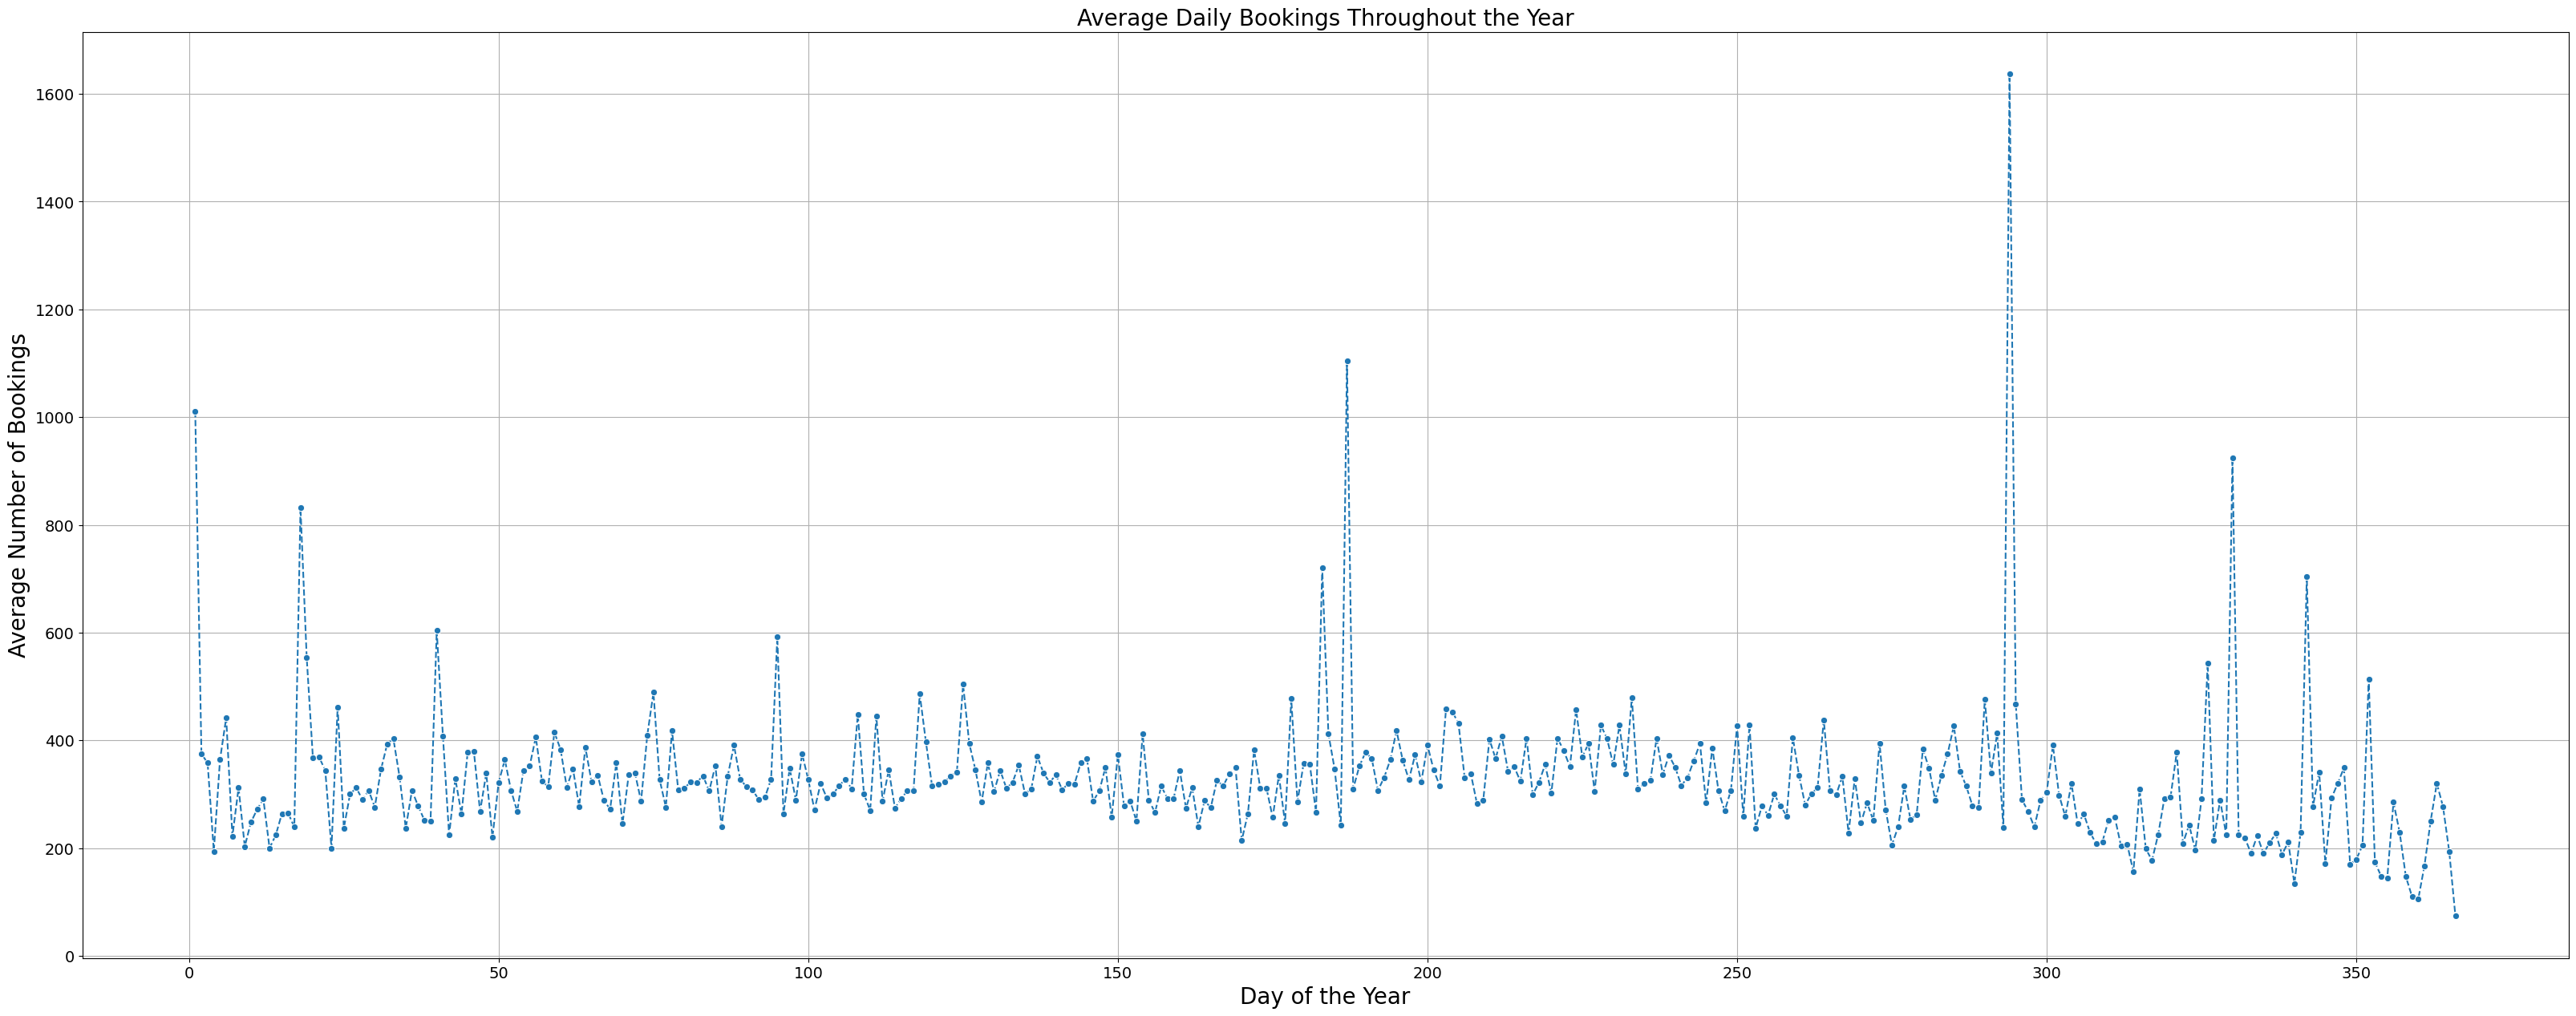

In [51]:
# Convert date columns to datetime
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])

# Extract day of the year from the reservation status date
hotel_data['day_of_year'] = hotel_data['reservation_status_date'].dt.dayofyear

# Calculate average bookings per day of the year across all years
average_yearly_bookings = hotel_data.groupby('day_of_year').size().reset_index(name='bookings')
average_yearly_bookings = average_yearly_bookings.groupby('day_of_year').mean().reset_index()

# Plot average daily bookings throughout the year
plt.figure(figsize=(40, 15))
sns.lineplot(data=average_yearly_bookings, x='day_of_year', y='bookings', marker='o', linestyle='--')
plt.title('Average Daily Bookings Throughout the Year', fontsize=20)
plt.xlabel('Day of the Year', fontsize=20)
plt.ylabel('Average Number of Bookings', fontsize=20)
plt.grid(True)
plt.show()

Monthly Bookings Analysis,by analyzing the number of bookings per month, we identified seasonal trends. This step provided insights into the distribution of bookings throughout the year, highlighting peak and off-peak periods.

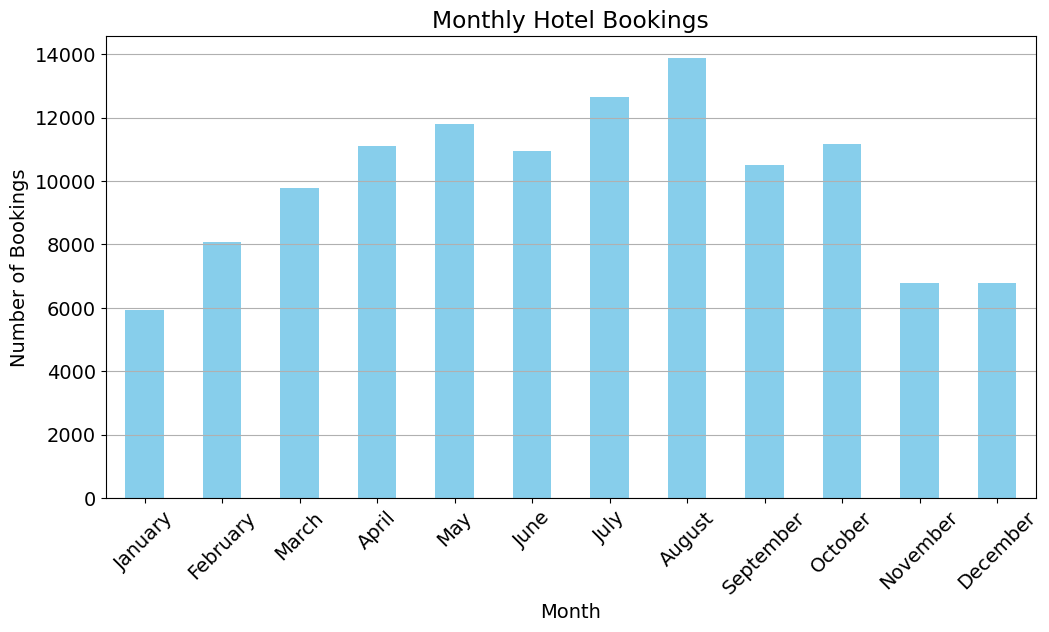

In [52]:
# Group by month to get the number of bookings per month
monthly_bookings = hotel_data.groupby('arrival_date_month').size()

# Plotting the monthly bookings
plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Monthly Hotel Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Bookings by Country and Continent, understanding geographical patterns is essential for targeted marketing strategies. We analyzed bookings by country and continent to identify key markets and potential growth areas.

In [53]:
guests_by_country = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_by_country.columns = ['country', 'No of guests']

# Crear el mapa de coropletas usando una escala de colores predefinida
guests_map = px.choropleth(guests_by_country, 
                           locations='country', 
                           color='No of guests', 
                           hover_name='country', 
                           color_continuous_scale='Oranges')  
guests_map.show()

In [54]:
# Filtrar y contar huéspedes por país
guests_by_country = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().reset_index()
guests_by_country.columns = ['country', 'No of guests']

# Definir los países europeos
european_countries = [
    'PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'ITA', 'BEL', 'NLD', 'CHE',
    'AUT', 'RUS', 'NOR', 'SWE', 'DNK', 'FIN', 'POL', 'CZE', 'HUN', 'GRC'
]

# Filtrar solo los países europeos
guests_by_country_europe = guests_by_country[guests_by_country['country'].isin(european_countries)]

# Crear el mapa de coropletas centrado en Europa
guests_map_europe = px.choropleth(guests_by_country_europe, 
                                  locations='country', 
                                  color='No of guests', 
                                  hover_name='country', 
                                  color_continuous_scale='Oranges',  
                                  scope='europe') 

# Mostrar el mapa
guests_map_europe.show()

Temporal Analysis Using Quartiles, to better understand booking patterns, we divided the months into different seasons using quartiles. This method ensures that each season reflects similar patterns in booking volumes, allowing for more precise analysis and strategy development.

In [55]:
# Quartiles
monthly_stats = monthly_bookings.describe()
q1 = monthly_stats['25%']
q2 = monthly_stats['50%']
q3 = monthly_stats['75%']

# Define seasons based on quartiles
low_season = monthly_bookings[monthly_bookings <= q1].index.tolist()
mid_low_season = monthly_bookings[(monthly_bookings > q1) & (monthly_bookings <= q2)].index.tolist()
mid_high_season = monthly_bookings[(monthly_bookings > q2) & (monthly_bookings <= q3)].index.tolist()
high_season = monthly_bookings[monthly_bookings > q3].index.tolist()

# Assign colors based on seasons
month_colors = ['#ff6961' if month in low_season else
                '#84b6f4' if month in mid_low_season else
                '#fdfd96' if month in mid_high_season else
                '#77dd77' for month in monthly_bookings.index]

By visualizing the defined seasons, we can clearly see the different booking patterns and how they vary throughout the year. This step is crucial for identifying key periods for pricing and promotional strategies.

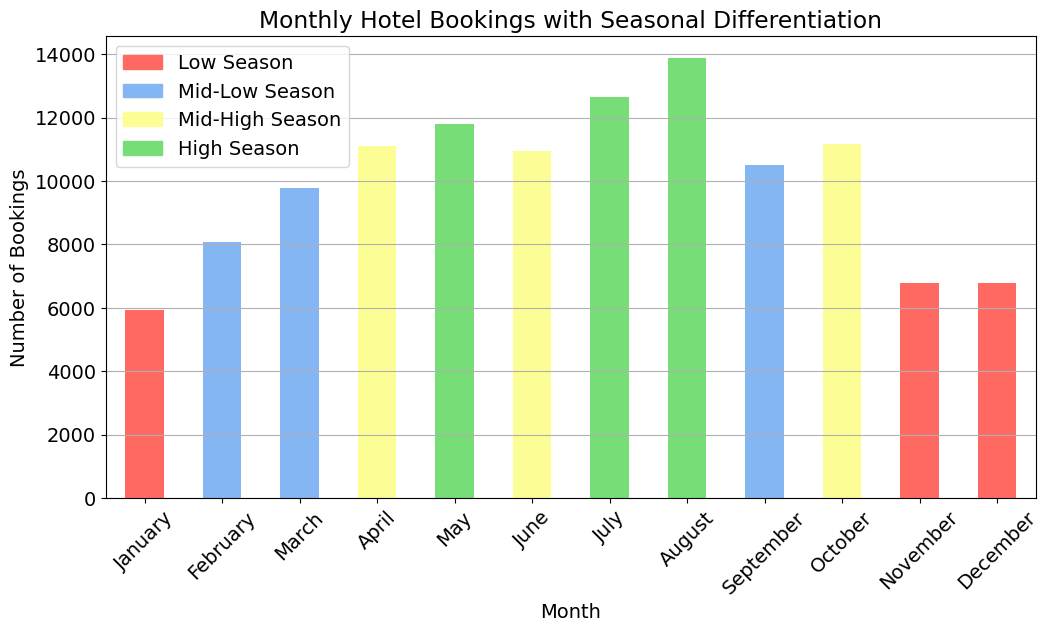

In [56]:
# Plotting the monthly bookings with differentiated seasons
plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar', color=month_colors)
plt.title('Monthly Hotel Bookings with Seasonal Differentiation')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Creating a custom legend
low_patch = mpatches.Patch(color='#ff6961', label='Low Season')
mid_low_patch = mpatches.Patch(color='#84b6f4', label='Mid-Low Season')
mid_high_patch = mpatches.Patch(color='#fdfd96', label='Mid-High Season')
high_patch = mpatches.Patch(color='#77dd77', label='High Season')
plt.legend(handles=[low_patch, mid_low_patch, mid_high_patch, high_patch])

# Show the plot
plt.show()

External events such as Christmas, New Year, Easter, and the summer season significantly impact booking patterns. By analyzing these events, we can tailor our pricing and promotional strategies to maximize occupancy and revenue. Thanks to our geographical distribution analysis by country and continent, we identified that the summer season in Europe is particularly important, highlighting the need for targeted strategies during this peak period.

In [57]:
# Define the events and their approximate dates
events = {
    'New Year': '01-01',
    'Easter': '04-04',  # Example date for Easter (varies by year)
    'Summer': ['07-01', '08-31'],  # Representing the whole summer
    'Christmas': '12-25'
}

# Function to filter bookings around event dates
def filter_event_impact(df, event_date, days_window=7):
    event_date = pd.to_datetime(event_date)
    start_date = event_date - pd.Timedelta(days=days_window)
    end_date = event_date + pd.Timedelta(days=days_window)
    return df[(df['reservation_status_date'] >= start_date) & (df['reservation_status_date'] <= end_date)]

# Calculate average bookings for each event
event_impact = {}
for event, date in events.items():
    if isinstance(date, list):
        event_data = hotel_data[(hotel_data['reservation_status_date'].dt.strftime('%m-%d') >= date[0]) & 
                        (hotel_data['reservation_status_date'].dt.strftime('%m-%d') <= date[1])]
    else:
        event_data = filter_event_impact(hotel_data, f'{hotel_data["arrival_date_year"].min()}-{date}')
    event_impact[event] = event_data.shape[0] / len(event_data['reservation_status_date'].dt.year.unique())

event_impact

{'New Year': 779.0, 'Easter': 57.0, 'Summer': 7785.0, 'Christmas': 780.0}

In [58]:
def calculate_avg_bookings(data, season_months, event_dates, days_window=7):
    season_data = data[data['arrival_date_month'].isin(season_months)]
    season_avg = season_data.shape[0] / len(season_data['reservation_status_date'].dt.year.unique())
    
    # Calcular el impacto de eventos dentro de la temporada
    event_impact_data = pd.DataFrame()
    for event, date in event_dates.items():
        if isinstance(date, list):
            event_data = season_data[(season_data['reservation_status_date'].dt.strftime('%m-%d') >= date[0]) & 
                                     (season_data['reservation_status_date'].dt.strftime('%m-%d') <= date[1])]
        else:
            event_date = pd.to_datetime(f'{season_data["arrival_date_year"].min()}-{date}')
            start_date = event_date - pd.Timedelta(days=days_window)
            end_date = event_date + pd.Timedelta(days=days_window)
            event_data = season_data[(season_data['reservation_status_date'] >= start_date) & 
                                     (season_data['reservation_status_date'] <= end_date)]
        
        avg_event = event_data.shape[0] / len(event_data['reservation_status_date'].dt.year.unique())
        event_impact_data = pd.concat([event_impact_data, pd.DataFrame({'Event': [event], 'Average Bookings': [avg_event]})], ignore_index=True)
    
    return season_avg, event_impact_data

# Calcular reservas promedio para cada temporada y el impacto de los eventos
season_avg_bookings = {}
event_impacts = {}

for season, months in zip(['Low Season', 'Mid-Low Season', 'Mid-High Season', 'High Season'], [low_season, mid_low_season, mid_high_season, high_season]):
    season_avg, event_impact_data = calculate_avg_bookings(hotel_data, months, events)
    season_avg_bookings[season] = season_avg
    event_impacts[season] = event_impact_data

Visualizing the impact of events within each season allows us to clearly see how different events affect booking patterns. This visualization is crucial for strategic planning and resource allocation.

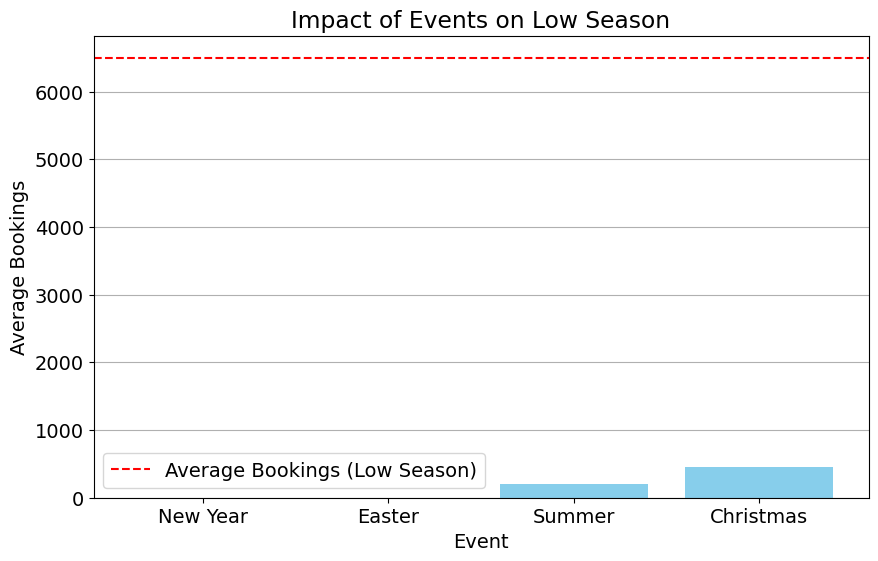

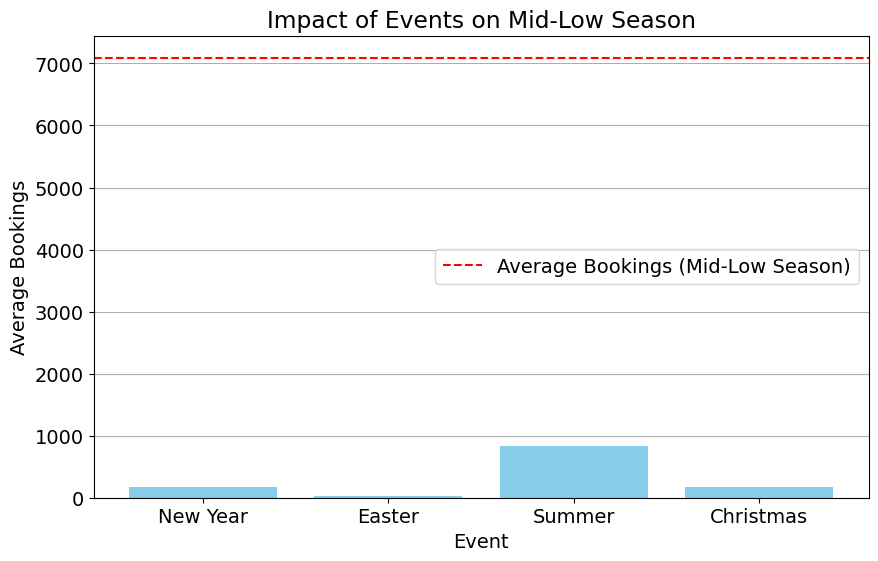

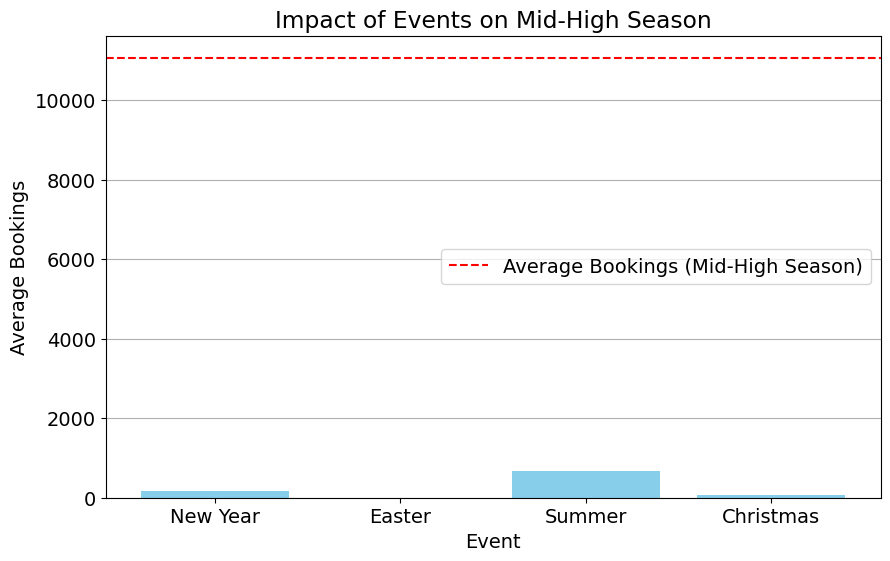

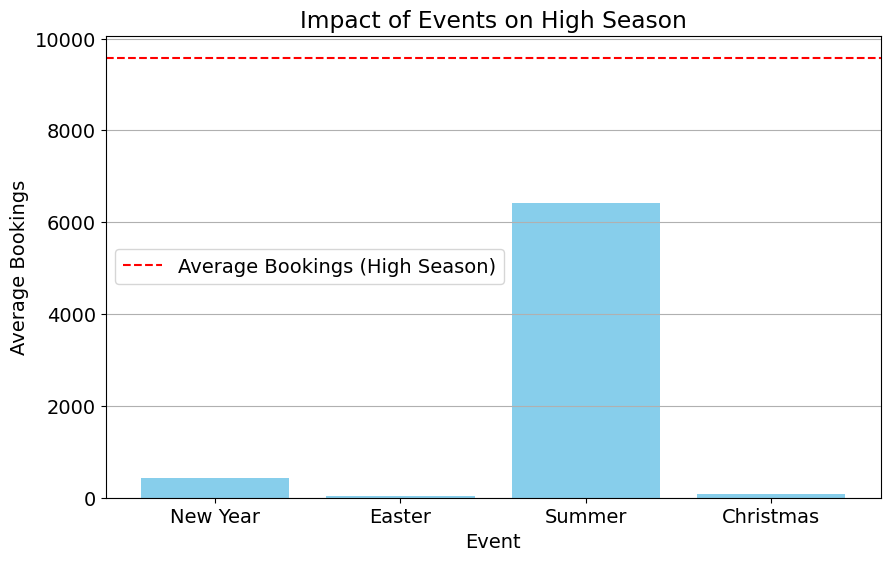

In [59]:
def plot_event_impact(season, event_impact_data, season_avg):
    plt.figure(figsize=(10, 6))
    plt.bar(event_impact_data['Event'], event_impact_data['Average Bookings'], color='skyblue')
    plt.axhline(y=season_avg, color='r', linestyle='--', label=f'Average Bookings ({season})')
    plt.title(f'Impact of Events on {season}')
    plt.xlabel('Event')
    plt.ylabel('Average Bookings')
    plt.legend()
    plt.grid(axis='y')
    plt.show()

# Plotting the impact of events within each season
for season, event_impact_data in event_impacts.items():
    plot_event_impact(season, event_impact_data, season_avg_bookings[season])

Based on the detailed analysis of monthly bookings and the impact of external events, we have identified clear seasonal patterns and periods of high demand in the hotel industry. Using quartiles, we have defined four distinct seasons that reflect variability in booking volumes:

### Low Season: January, February, November, December
Statistical Justification: These months fall within the first quartile of monthly bookings, representing the lowest levels of activity. Marketing campaigns focused on Christmas and New Year can help increase occupancy during this period.

### Mid-Low Season: March, April, October
Statistical Justification: These months fall between the first and second quartiles, showing a moderate increase in bookings. Specific promotions during Easter can significantly boost occupancy in these months.

### Mid-High Season: May, June, September
Statistical Justification: These months fall between the second and third quartiles, indicating a notable increase in bookings. Preparing for higher demand during the summer is crucial for maximizing revenue.

### High Season: July, August
Statistical Justification: These months fall within the fourth quartile, representing the highest peak in bookings. Optimizing resources and strategies to manage high demand and maximize profitability is essential during this period.

## Event Impact Analysis
The additional analysis of external events, such as Christmas, New Year, Easter, and the summer season, revealed significant impacts on bookings during these periods:

- **Christmas and New Year:** These events significantly increase bookings during the Low Season, highlighting the importance of these holidays for attracting guests.
- **Easter:** This event has a considerable impact on the Mid-Low Season, suggesting that promotional strategies should focus on this holiday.
- **Summer:** The months of July and August consistently show high bookings, confirming that the summer is the peak season for tourism.

## Proposed Pricing Model
To optimize revenue and occupancy rates, we propose a dynamic pricing model tailored to the identified seasons and key events. The pricing strategy should adjust based on the booking patterns and demand fluctuations observed in each season.

### Low Season (January, February, November, December):
- Base Price: 80% of the annual average daily rate (ADR)
- Christmas and New Year: Increase to 110% of the base price during these holidays to capitalize on higher demand.

### Mid-Low Season (March, April, October):
- Base Price: 90% of the annual ADR
- Easter: Increase to 120% of the base price during the Easter holiday period to maximize occupancy and revenue.

### Mid-High Season (May, June, September):
- Base Price: 110% of the annual ADR
- Summer Preparation: Maintain base price with occasional promotional discounts to encourage early bookings.

### High Season (July, August):
- Base Price: 130% of the annual ADR
- Peak Demand: Implement premium pricing strategies, with prices adjusted upwards based on occupancy rates and demand forecasts.

---

In conclusion, segmenting hotel bookings into four distinct seasons based on quartiles and analyzing the impact of external events allows us to formulate specific pricing strategies for each period. The proposed dynamic pricing model ensures that room rates are adjusted to reflect demand variations, thereby optimizing both occupancy and revenue.

By tailoring marketing and operational strategies to these insights, we can effectively manage hotel occupancy and maximize revenue throughout the year. This approach will enable us to respond proactively to market conditions, ensuring competitive pricing and enhanced profitability.